# Understand the life cycle of floorplans
- DS: Nhan Le
- PM: Sean Corriel

**Objective: **

    - how often are 3D floor plan users creating new floor plans over time

    - what frequency buckets do customers fall into? 

    - how is this distributed across customer base

    - how does this behavior differ between free trial / paid pros

    - how we can we distinguish (via dashboards) number of floor plans created by free trial vs paid customers

 

In Future phases, we can enrich this understanding with engagement events - editing properties within a floor plan, to gain a more resolution into the lifecycle of floor plans

adding a 3D product

modifying a 3D object (wall, or product) 

Sharing a 3D Floor Plan

Floor Plan Creation on mobile or web

Floor Plan Duplication - duplicated a floor plan and applying ‘edits’ to a duplicated floor planNeeded for access to all other apps. It would be a good idea to install ASAP. 

In [3]:
from pyhive import presto
import pandas as pd
import matplotlib as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

from pyhive import presto
conn = presto.connect(host='presto-alpha-backend.data.houzz.net', port=8086)

In [4]:
# floor plan data tables

def floor_plan_table_samples():
    floorplan_sql = '''
    SELECT floorplan_id, company_user_id, individual_user_id, created_at, created_dt, project_id, is_demo_project
    FROM hive.gaia.dim_floorplans
    ORDER BY 2, 3
    LIMIT 10
    '''
    floorplan_df = pd.read_sql(floorplan_sql, conn)

    floorplan_elem_sql = '''
    SELECT floorplan_element_id, floorplan_id, company_user_id, individual_user_id, created_at, created_dt, modified_at, modified_dt, "type", type_name
    FROM hive.gaia.dim_floorplan_elements
    ORDER BY 3, 5
    LIMIT 10
    '''
    floorplan_elem_df = pd.read_sql(floorplan_elem_sql, conn)

    fp_sql = """
    SELECT event_id, individual_user_id, visitor_id, client_id, experience_site_name, session_id, device_type, app_type, app_sub_type, browser_name, 
    flow_name, experience_name, event_source_section, event_source_container, event_source_component, event_timestamp, event_type, other_params, 
    other_ids, event_details, floorplan_id, company_user_id, mid, event_name, dt
    FROM hive.gaia.fact_floorplans
    ORDER BY 3, event_timestamp
    LIMIT 10"""
    floorplan_facts = pd.read_sql(fp_sql, conn)
    return floorplan_df, floorplan_elem_df, floorplan_facts

floor_plan_tables = floor_plan_table_samples()

In [8]:
# element table first few rows
floor_plan_tables[1]

,floorplan_element_id,floorplan_id,company_user_id,individual_user_id,created_at,created_dt,modified_at,modified_dt,type,type_name
0,3152843,177545514,284,284,2021-10-05 15:56:54.000,2021-10-05,2021-10-05 15:57:22.000,2021-10-05,15,point
1,3152840,177545514,284,284,2021-10-05 15:56:54.000,2021-10-05,2021-10-05 15:56:54.000,2021-10-05,15,point
2,3152845,177545514,284,284,2021-10-05 15:56:54.000,2021-10-05,2021-10-05 15:57:22.000,2021-10-05,11,wall
3,3152848,177545514,284,284,2021-10-05 15:56:54.000,2021-10-05,2021-10-05 15:57:22.000,2021-10-05,10,floor
4,3152847,177545514,284,284,2021-10-05 15:56:54.000,2021-10-05,2021-10-05 15:57:22.000,2021-10-05,11,wall
5,3152842,177545514,284,284,2021-10-05 15:56:54.000,2021-10-05,2021-10-05 15:56:54.000,2021-10-05,15,point
6,3152841,177545514,284,284,2021-10-05 15:56:54.000,2021-10-05,2021-10-05 15:56:54.000,2021-10-05,15,point
7,3152844,177545514,284,284,2021-10-05 15:56:54.000,2021-10-05,2021-10-05 15:56:54.000,2021-10-05,11,wall
8,3152846,177545514,284,284,2021-10-05 15:56:54.000,2021-10-05,2021-10-05 15:56:54.000,2021-10-05,11,wall
9,14119522,187195106,378,378,2022-06-09 00:03:35.000,2022-06-08,2022-06-09 00:03:35.000,2022-06-08,11,wall


In [12]:
# event table first few rows
floor_plan_tables[2].iloc[:, 0:12]

,event_id,individual_user_id,visitor_id,client_id,experience_site_name,session_id,device_type,app_type,app_sub_type,browser_name,flow_name,experience_name
0,2c511b44-ed62-4969-a46b-19d7e5ea9525,66130159,0000f4c9-e9fb-4a9c-bab9-da529ca2fe28,0000f4c9-e9fb-4a9c-bab9-da529ca2fe28,Houzz Pro US,3e6dabd8-3e13-4bf6-833d-f3d01c31e830,DESKTOP,web,Jukwaa Web,Chrome,None,Floor Plan - Edit
1,eab90c36-bd1d-4c88-b4c0-6251153591bb,66130159,0000f4c9-e9fb-4a9c-bab9-da529ca2fe28,0000f4c9-e9fb-4a9c-bab9-da529ca2fe28,None,None,DESKTOP,web,Jukwaa Web,Chrome,None,None
2,eaf70f84-d82e-4585-9ad5-3aa2b0a8bc64,66130159,0000f4c9-e9fb-4a9c-bab9-da529ca2fe28,0000f4c9-e9fb-4a9c-bab9-da529ca2fe28,Houzz Pro US,3e6dabd8-3e13-4bf6-833d-f3d01c31e830,DESKTOP,web,Jukwaa Web,Chrome,None,Floor Plan - Edit
3,c7deb76f-4dd8-4d27-8546-77c2a276d14f,66130159,0000f4c9-e9fb-4a9c-bab9-da529ca2fe28,0000f4c9-e9fb-4a9c-bab9-da529ca2fe28,None,None,DESKTOP,web,Jukwaa Web,Chrome,None,None
4,2b030f1c-e9ce-485f-bcbd-dffe38b77e72,66130159,0000f4c9-e9fb-4a9c-bab9-da529ca2fe28,0000f4c9-e9fb-4a9c-bab9-da529ca2fe28,Houzz Pro US,3e6dabd8-3e13-4bf6-833d-f3d01c31e830,DESKTOP,web,Jukwaa Web,Chrome,None,Floor Plan - Edit
5,d554447b-3d57-4507-bd60-9764d3de67b7,66130159,0000f4c9-e9fb-4a9c-bab9-da529ca2fe28,0000f4c9-e9fb-4a9c-bab9-da529ca2fe28,Houzz Pro US,3e6dabd8-3e13-4bf6-833d-f3d01c31e830,DESKTOP,web,Jukwaa Web,Chrome,None,Floor Plan - Edit
6,5c336163-e1b1-4896-8c0f-0e5ff1688443,66130159,0000f4c9-e9fb-4a9c-bab9-da529ca2fe28,0000f4c9-e9fb-4a9c-bab9-da529ca2fe28,Houzz Pro US,3e6dabd8-3e13-4bf6-833d-f3d01c31e830,DESKTOP,web,Jukwaa Web,Chrome,None,Floor Plan - Edit
7,ed3b86ee-0f12-417b-b858-96c7c01c07bc,66130159,0000f4c9-e9fb-4a9c-bab9-da529ca2fe28,0000f4c9-e9fb-4a9c-bab9-da529ca2fe28,Houzz Pro US,3e6dabd8-3e13-4bf6-833d-f3d01c31e830,DESKTOP,web,Jukwaa Web,Chrome,None,Floor Plan - Edit
8,e142bfe6-fc8d-45df-bd2b-df5be9d03f11,66130159,0000f4c9-e9fb-4a9c-bab9-da529ca2fe28,0000f4c9-e9fb-4a9c-bab9-da529ca2fe28,Houzz Pro US,3e6dabd8-3e13-4bf6-833d-f3d01c31e830,DESKTOP,web,Jukwaa Web,Chrome,None,Floor Plan - Edit
9,6dc0432f-9b78-49b6-84a8-22781236496c,66130159,0000f4c9-e9fb-4a9c-bab9-da529ca2fe28,0000f4c9-e9fb-4a9c-bab9-da529ca2fe28,Houzz Pro US,3e6dabd8-3e13-4bf6-833d-f3d01c31e830,DESKTOP,web,Jukwaa Web,Chrome,None,Floor Plan - Edit


In [15]:
floor_plan_tables[2].iloc[:, 12:]

,event_source_section,event_source_container,event_source_component,event_timestamp,event_type,other_params,other_ids,event_details,floorplan_id,company_user_id,mid,event_name,dt
0,quick_action_section,None,floorplan,2022-02-03 14:30:31.711,Outcome,{},{},"{""floor_plan_id"":183256639,""floor_plan_rank"":4...",183256639,14333750,-571884534827799,Floor Plan Created Client,2022-02-03
1,None,None,None,2022-02-03 14:31:11.056,Outcome,{},{},"{""floor_plan_created_at"":""2022-02-03T06:31:11-...",183256639,14333750,-571884534827799,Floor Plan Created,2022-02-03
2,quick_action_section,None,floorplan,2022-02-03 15:02:06.962,Outcome,{},{},"{""floor_plan_id"":183257394,""floor_plan_rank"":5...",183257394,14333750,-571884534827799,Floor Plan Created Client,2022-02-03
3,None,None,None,2022-02-03 15:02:46.930,Outcome,{},{},"{""floor_plan_created_at"":""2022-02-03T07:02:46-...",183257394,14333750,-571884534827799,Floor Plan Created,2022-02-03
4,Right Rail,Products,None,2022-02-03 15:06:38.341,Outcome,{},{},"{""floor_plan_id"":""183257394"",""floor_plan_item_...",183257394,14333750,-571884534827799,Floor Plan Item Added,2022-02-03
5,Right Rail,None,None,2022-02-03 15:07:15.566,Outcome,{},{},"{""floor_plan_id"":""183257394"",""floor_plan_item_...",183257394,14333750,-571884534827799,Floor Plan Item Added,2022-02-03
6,Right Rail,Products,None,2022-02-03 15:07:42.712,Outcome,{},{},"{""floor_plan_id"":""183257394"",""floor_plan_item_...",183257394,14333750,-571884534827799,Floor Plan Item Added,2022-02-03
7,None,None,None,2022-02-03 15:08:28.128,Outcome,{},{},"{""floor_plan_id"":""183257394"",""floor_plan_item_...",183257394,14333750,-571884534827799,Floor Plan Item Added,2022-02-03
8,Right Rail,None,None,2022-02-03 15:08:42.768,Outcome,{},{},"{""floor_plan_id"":""183257394"",""floor_plan_prope...",183257394,14333750,-571884534827799,Floor Plan Item Property Updated,2022-02-03
9,Right Rail,None,None,2022-02-03 15:08:43.031,Outcome,{},{},"{""floor_plan_id"":""183257394"",""floor_plan_prope...",183257394,14333750,-571884534827799,Floor Plan Item Property Updated,2022-02-03


In [14]:
# check visitor_id and client_id matches
(floor_plan_tables[2].iloc[:, 2] == floor_plan_tables[2].iloc[:, 3]).all()

True

## dim_floorplans study

In [139]:
# get size of dim_floorplans - looks like 214k and growing, managable

def floorplan_table_size():
    floorplan_sql = '''
    SELECT count(*) as floorplan_row_count
    FROM hive.gaia.dim_floorplans
    '''
    
    return pd.read_sql(floorplan_sql, conn)

floorplan_table_size()

,floorplan_row_count
0,213557


In [107]:
# get number of companies from dim_floorplans
def num_companies():
    company_sql = '''
    SELECT count(distinct company_user_id) as num_companies_from_floorplans
    FROM hive.gaia.dim_floorplans
    '''
    return pd.read_sql(company_sql, conn)

num_companies()

,num_companies_from_floorplans
0,69650


In [101]:
# get small sample of hive.gaia.dim_company_user_sku_ranges
def view_sample_company_user_sku_ranges():
    sku_ranges_sql = '''
    SELECT *
    FROM hive.gaia.dim_company_user_sku_ranges
    ORDER BY 1, 2
    LIMIT 10
    '''
    return pd.read_sql(sku_ranges_sql, conn)

view_sample_company_user_sku_ranges()

,company_user_id,sku,free_or_paying,origin,start_dt,end_dt,is_still_live
0,-1,Freemium 1.0,freemium,ads.pro_plus_professionals_ext_daily,2021-08-26,2022-10-08,0
1,48,Freemium 1.0,freemium,ads.pro_plus_professionals_ext_daily,2021-08-26,2022-10-08,0
2,55,Freemium 1.0,freemium,ads.pro_plus_professionals_ext_daily,2021-08-26,2022-10-08,0
3,69,Freemium 1.0,freemium,ads.pro_plus_professionals_ext_daily,2021-08-26,2022-10-08,0
4,105,Freemium 1.0,freemium,ads.pro_plus_professionals_ext_daily,2021-08-26,2022-10-08,0
5,106,Freemium 1.0,freemium,ads.pro_plus_professionals_ext_daily,2021-08-26,2022-10-08,0
6,107,Freemium 1.0,freemium,ads.pro_plus_professionals_ext_daily,2021-08-26,2022-10-08,0
7,108,Freemium 1.0,freemium,ads.pro_plus_professionals_ext_daily,2021-08-26,2022-10-08,0
8,109,Freemium 1.0,freemium,ads.pro_plus_professionals_ext_daily,2021-08-26,2022-10-08,0
9,110,Freemium 1.0,freemium,ads.pro_plus_professionals_ext_daily,2021-08-26,2022-10-08,0


In [106]:
# get number of companies from dim_company_user_sku_ranges
def num_companies_sku_ranges():
    company_sql = '''
    SELECT count(distinct company_user_id) as num_companies_from_sku_ranges
    FROM hive.gaia.dim_company_user_sku_ranges
    '''
    return pd.read_sql(company_sql, conn)

num_companies_sku_ranges()

,num_companies_from_sku_ranges
0,3566802


### validate joining floorplans data with company data

In [135]:
# join floorplan and sku_range tables to include company's information 
# 
def join_floorplans_companies():
    sku_sql = '''
    with comp as (
        SELECT * 
        -- number of start_dt for each company_user_id
        , COUNT(start_dt) OVER (PARTITION BY company_user_id) AS num_policies_started
        , ROW_NUMBER() OVER (PARTITION BY company_user_id ORDER BY start_dt) AS policy_num
        -- first join and last active
        , MIN(date(start_dt)) OVER (PARTITION BY company_user_id) AS first_join_dt
        , MAX(date(end_dt)) OVER (PARTITION BY company_user_id) AS last_active_dt
        -- get first and last free_or_paying status
        , FIRST_VALUE(free_or_paying) OVER (PARTITION BY company_user_id ORDER BY start_dt) AS first_status
        , FIRST_VALUE(free_or_paying) OVER (PARTITION BY company_user_id ORDER BY end_dt DESC) AS last_status
        -- lagged status
        , LAG(free_or_paying) OVER (PARTITION BY company_user_id ORDER BY start_dt) previous_status
        -- next status
        , LEAD(free_or_paying) OVER (PARTITION BY company_user_id ORDER BY start_dt) next_status
        FROM hive.gaia.dim_company_user_sku_ranges
        )
    , fp as (
        SELECT floorplan_id, company_user_id, individual_user_id, created_at, created_dt, project_id, is_demo_project
        FROM hive.gaia.dim_floorplans
        ORDER BY 2, 3
    )
    SELECT count(*) as floorplan_row_count_with_company_info
    --fp.*
    --, comp.sku, comp.start_dt, comp.end_dt, comp.is_still_live, comp.free_or_paying, comp.num_policies_started, comp.policy_num, comp.first_status, comp.last_status, comp.previous_status
    --, comp.first_join_dt, comp.last_active_dt
    
    -- to match start and end dates with floorplans, first left outer join then keep only rows where created_dt is between start_dt and end_dt    
    FROM fp LEFT OUTER JOIN comp ON fp.company_user_id = comp.company_user_id
    WHERE created_at BETWEEN date_add('day',-1, date(start_dt)) AND date_add('day',1, date(end_dt))
    

    --ORDER BY fp.company_user_id, created_at
    
    '''
    df =  pd.read_sql(sku_sql, conn)
    return df

join_floorplans_companies()

,floorplan_row_count_with_company_info
0,199745


In [140]:
# need to investigate why lost 10% of floorplans
# join companies' first start and last end with floorpland data then check number of floorplans created during start and end dates
def check_floorplans_companies_dates():
    sku_sql = '''
    with comp as (
        SELECT company_user_id 
        -- number of start_dt for each company_user_id
        , COUNT(start_dt) AS num_policies_started
        -- first join and last active
        , MIN(date(start_dt)) AS first_join_dt
        , MAX(date(end_dt)) AS last_active_dt

        FROM hive.gaia.dim_company_user_sku_ranges
        GROUP BY 1
        )

    SELECT count(*) as floorplan_row_count_between_first_and_last_dates
    -- to match start and end dates with floorplans, first left join then keep only rows where created_dt is between start_dt and end_dt    
    FROM hive.gaia.dim_floorplans fp LEFT JOIN comp ON fp.company_user_id = comp.company_user_id
    WHERE CASE WHEN date(created_dt) < first_join_dt THEN first_join_dt 
            ELSE CASE WHEN date(created_dt) > last_active_dt THEN last_active_dt 
                ELSE date(created_dt) END 
                END                
            BETWEEN first_join_dt AND last_active_dt 
    --ORDER BY fp.company_user_id, created_at
    
    LIMIT 20

    
    '''
    df =  pd.read_sql(sku_sql, conn)
    return df

check_floorplans_companies_dates()

,floorplan_row_count_between_first_and_last_dates
0,213553


In [246]:
# correct join_floorplans_companies() by first adjusting start_dt so they lie inside first join and last active
def join_floorplans_companies_adjust_create_dt():
    sku_sql = '''
    with comp as (
        SELECT * 
        -- number of start_dt for each company_user_id
        , COUNT(start_dt) OVER (PARTITION BY company_user_id) AS num_policies_started
        , ROW_NUMBER() OVER (PARTITION BY company_user_id ORDER BY start_dt) AS policy_num
        -- first join and last active
        , MIN(date(start_dt)) OVER (PARTITION BY company_user_id) AS first_join_dt
        , MAX(date(end_dt)) OVER (PARTITION BY company_user_id) AS last_active_dt
        -- get first and last free_or_paying status
        , CASE WHEN FIRST_VALUE(free_or_paying) OVER (PARTITION BY company_user_id ORDER BY start_dt) = 'paying' THEN 'paying'
            ELSE 'not-paying' END AS first_status

        , FIRST_VALUE(free_or_paying) OVER (PARTITION BY company_user_id ORDER BY end_dt DESC) AS last_status
        -- lagged status
        , LAG(free_or_paying) OVER (PARTITION BY company_user_id ORDER BY start_dt) previous_status
        -- next status
        , LEAD(free_or_paying) OVER (PARTITION BY company_user_id ORDER BY start_dt) next_status
        FROM hive.gaia.dim_company_user_sku_ranges
        )
    --, fp as (
    --    SELECT floorplan_id, company_user_id, individual_user_id, created_at, created_dt, project_id, is_demo_project
    --    FROM hive.gaia.dim_floorplans
    --    ORDER BY 2, 3)
    SELECT count(*) as floorplan_row_count_with_company_info
    --fp.*
    --, comp.sku, comp.start_dt, comp.end_dt, comp.is_still_live, comp.free_or_paying, comp.num_policies_started, comp.policy_num, comp.first_status, comp.last_status, comp.previous_status
    --, comp.first_join_dt, comp.last_active_dt
    
    -- to match start and end dates with floorplans, first left outer join then keep only rows where created_dt is between start_dt and end_dt    
    FROM hive.gaia.dim_floorplans fp LEFT OUTER JOIN comp ON fp.company_user_id = comp.company_user_id
    WHERE CASE WHEN date(fp.created_at) < first_join_dt THEN first_join_dt 
            ELSE CASE WHEN date(fp.created_at) > last_active_dt THEN last_active_dt 
                ELSE date(fp.created_at) END 
                END 
        >= date(comp.start_dt) 
    AND CASE WHEN date(fp.created_at) < first_join_dt THEN first_join_dt 
            ELSE CASE WHEN date(fp.created_at) > last_active_dt THEN last_active_dt 
                ELSE date(fp.created_at) END 
                END 
        <= date(comp.end_dt)
    

    --ORDER BY fp.company_user_id, created_at
    
    '''
    df =  pd.read_sql(sku_sql, conn)
    return df

join_floorplans_companies_adjust_create_dt()

,floorplan_row_count_with_company_info
0,213071


In [ ]:
# get floorplan_df first few rows
floor_plan_tables[0]

,floorplan_id,company_user_id,individual_user_id,created_at,created_dt,project_id,is_demo_project
0,177545514,284,284,2021-10-05 15:56:54.000,2021-10-05,None,False
1,187195106,378,378,2022-06-09 00:03:35.000,2022-06-08,None,False
2,187385470,378,73379553,2022-06-15 20:15:21.000,2022-06-15,None,False
3,187449848,1176,1176,2022-06-18 01:30:41.000,2022-06-17,None,False
4,174390985,1178,1178,2021-06-24 22:49:13.000,2021-06-24,None,False
5,164821150,1536,1536,2020-10-01 19:47:06.000,2020-10-01,None,False
6,163061261,1565,1565,2020-08-13 17:07:48.000,2020-08-13,None,False
7,189800052,1565,1565,2022-08-29 18:37:01.000,2022-08-29,None,False
8,172183122,2350,2350,2021-04-28 18:19:57.000,2021-04-28,None,False
9,185122583,2369,2369,2022-03-29 14:03:52.000,2022-03-29,None,False


In [18]:
# number of distinct user_id in dim_floorplans
# it appears that several companies have more than one individual users
# confirm with team: company is the better counts?
def floorplan_user_id_count():
    floorplan_sql = '''
    SELECT count(distinct company_user_id) as company_user_id_count, count(distinct individual_user_id) as individual_user_id_count
    FROM hive.gaia.dim_floorplans
    '''
    
    return pd.read_sql(floorplan_sql, conn)

floorplan_user_id_count()

,company_user_id_count,individual_user_id_count
0,69396,71239


In [21]:
# for each company_user_id, how many individual_user_id?
# tabulate company_user_id by number of individual_user_idgaia.dim_floorplans
def floorplan_user_id_count_by_company():
    floorplan_sql = '''
    with companies as (
        SELECT company_user_id, count(distinct individual_user_id) as individual_user_count
        FROM hive.gaia.dim_floorplans
        GROUP BY 1)
    SELECT individual_user_count AS indivdual_user_count_per_company, count(distinct company_user_id) as company_count
    FROM companies
    GROUP BY 1
    ORDER BY 1

    '''
    
    return pd.read_sql(floorplan_sql, conn)

floorplan_user_id_count_by_company()

,indivdual_user_count_per_company,company_count
0,1,67970
1,2,1110
2,3,212
3,4,61
4,5,26
5,6,9
6,7,2
7,9,2
8,11,3
9,12,1


In [22]:
# doubtful if definition of floorplan_id is consistent with what I think of as a floorplan
# for now just tabulate company_user_id by number of distinct floorplan_id
def floorplan_id_count_by_company():
    floorplan_sql = '''
    with companies as (
        SELECT company_user_id, count(distinct floorplan_id) as floorplan_count
        FROM hive.gaia.dim_floorplans
        GROUP BY 1)
    SELECT floorplan_count AS floorplan_count_per_company, count(distinct company_user_id) as company_count
    FROM companies
    GROUP BY 1
    ORDER BY 1

    '''
    
    return pd.read_sql(floorplan_sql, conn)

floorplan_id_count_by_company()

,floorplan_count_per_company,company_count
0,1,45046
1,2,8894
2,3,4134
3,4,2364
4,5,1650
...,...,...
148,255,1
149,306,1
150,352,1
151,588,1


In [96]:
# randomly sample 10 companies with 5 to 10 floolplans and look at all their rows in dim_floorplans
def floorplan_id_count_by_company_sample():
    floorplan_sql = '''
    with companies as (
        SELECT *, 
        count(floorplan_id) over(partition by company_user_id) as floorplan_count
        FROM hive.gaia.dim_floorplans)
    SELECT * FROM companies
    WHERE floorplan_count >= 5 and floorplan_count <= 10
    ORDER BY company_user_id, created_at
    LIMIT 20
    '''
    
    return pd.read_sql(floorplan_sql, conn)

floorplan_id_count_by_company_sample()

,floorplan_id,company_user_id,individual_user_id,created_at,created_dt,project_id,is_demo_project,floorplan_count
0,164671135,10650,10650,2020-09-28 15:33:53.000,2020-09-28,None,False,5
1,168990507,10650,10650,2021-01-28 14:38:39.000,2021-01-28,None,False,5
2,168990533,10650,10650,2021-01-28 14:41:04.000,2021-01-28,None,False,5
3,183731824,10650,10650,2022-02-14 18:20:37.000,2022-02-14,None,False,5
4,183731836,10650,10650,2022-02-14 18:20:55.000,2022-02-14,None,False,5
5,190309939,11279,11279,2022-09-16 22:02:40.000,2022-09-16,None,False,7
6,190311496,11279,11279,2022-09-17 01:29:40.000,2022-09-16,None,False,7
7,190329738,11279,11279,2022-09-18 17:50:46.000,2022-09-18,None,False,7
8,190330475,11279,11279,2022-09-18 19:09:16.000,2022-09-18,None,False,7
9,190330550,11279,11279,2022-09-18 19:17:35.000,2022-09-18,None,False,7


In [26]:
# view all rows for a company_user_id = 63191
def floorplan_id_count_by_company_63191():
    floorplan_sql = '''
    SELECT * FROM hive.gaia.dim_floorplans
    WHERE company_user_id = 63191
    ORDER BY created_at
    '''
    
    return pd.read_sql(floorplan_sql, conn)

floorplan_id_count_by_company_63191()

,floorplan_id,company_user_id,individual_user_id,created_at,created_dt,project_id,is_demo_project
0,182656709,63191,63191,2022-01-16 16:11:38.000,2022-01-16,None,False
1,182658859,63191,63191,2022-01-16 18:18:26.000,2022-01-16,None,False
2,182658868,63191,63191,2022-01-16 18:18:50.000,2022-01-16,None,False
3,182658880,63191,63191,2022-01-16 18:19:19.000,2022-01-16,None,False
4,182686752,63191,63191,2022-01-17 18:22:02.000,2022-01-17,None,False
5,183104134,63191,63191,2022-01-31 00:23:28.000,2022-01-30,None,False


In [77]:
# flag floorplan_id that appears within 1min of previous floorplan_id then floorplan_id_count_by_company_sample 
# to see if there are any floorplan_id that are duplicates
def floorplan_by_company_sample_1min():
    floorplan_sql = '''
    with companies as (
        SELECT *, 
            count(floorplan_id) over(partition by company_user_id) as floorplan_count,
            -- number of minutes between lag(created_at) and created_at
            -- then convert to minutes
            if(created_at - lag(created_at) over(partition by company_user_id order by created_at) < parse_duration('1m'), 1) as possible_overlap,
            date_diff('minute', lag(created_at) over(partition by company_user_id order by created_at), created_at) as minutes_since_prev
            FROM hive.gaia.dim_floorplans
        )
    SELECT * FROM companies
    WHERE floorplan_count >= 5 and floorplan_count <= 10
    -- AND minutes_since_prev <= 1
    ORDER BY company_user_id, created_at
    LIMIT 15
    '''
    
    return pd.read_sql(floorplan_sql, conn)

floorplan_by_company_sample_1min()

,floorplan_id,company_user_id,individual_user_id,created_at,created_dt,project_id,is_demo_project,floorplan_count,prev_created_at,possible_overlap,minutes_since_prev
0,164671135,10650,10650,2020-09-28 15:33:53.000,2020-09-28,None,False,5,None,NaN,NaN
1,168990507,10650,10650,2021-01-28 14:38:39.000,2021-01-28,None,False,5,2020-09-28 15:33:53.000,NaN,175624.0
2,168990533,10650,10650,2021-01-28 14:41:04.000,2021-01-28,None,False,5,2021-01-28 14:38:39.000,NaN,2.0
3,183731824,10650,10650,2022-02-14 18:20:37.000,2022-02-14,None,False,5,2021-01-28 14:41:04.000,NaN,550299.0
4,183731836,10650,10650,2022-02-14 18:20:55.000,2022-02-14,None,False,5,2022-02-14 18:20:37.000,1.0,0.0
5,190309939,11279,11279,2022-09-16 22:02:40.000,2022-09-16,None,False,7,None,NaN,NaN
6,190311496,11279,11279,2022-09-17 01:29:40.000,2022-09-16,None,False,7,2022-09-16 22:02:40.000,NaN,207.0
7,190329738,11279,11279,2022-09-18 17:50:46.000,2022-09-18,None,False,7,2022-09-17 01:29:40.000,NaN,2421.0
8,190330475,11279,11279,2022-09-18 19:09:16.000,2022-09-18,None,False,7,2022-09-18 17:50:46.000,NaN,78.0
9,190330550,11279,11279,2022-09-18 19:17:35.000,2022-09-18,None,False,7,2022-09-18 19:09:16.000,NaN,8.0


### overlapping floorplans

In [93]:
# doubtful if definition of floorplan_id is consistent with what I think of as a floorplan
# for now just tabulate company_user_id by number of distinct floorplan_id
# eliminate floorplan_id that appears within 1min of previous floorplan_id
def floorplan_id_count_by_company_no_overlapping():
    floorplan_sql = '''
    with companies as (
        SELECT *, 
            count(floorplan_id) over(partition by company_user_id) as floorplan_count,
            coalesce(date_diff('minute', lag(created_at) over(partition by company_user_id order by created_at), created_at), 2) as minutes_since_prev
            FROM hive.gaia.dim_floorplans
        )
    ,filtered as (SELECT * FROM companies WHERE minutes_since_prev > 1)
    ,grouped as (
        SELECT company_user_id, count(distinct floorplan_id) as floorplan_count
        FROM filtered
        GROUP BY 1)
    SELECT floorplan_count AS floorplan_count_per_company, count(distinct company_user_id) as company_count
    FROM grouped
    GROUP BY 1
    ORDER BY 1

    '''
    
    return pd.read_sql(floorplan_sql, conn)

floorplan_id_count_by_company_no_overlapping()

,floorplan_count_per_company,company_count
0,1,46400
1,2,8925
2,3,4060
3,4,2300
4,5,1571
...,...,...
106,188,1
107,192,1
108,195,1
109,364,1


In [84]:
floorplan_id_count_by_company()

,floorplan_count_per_company,company_count
0,1,45046
1,2,8894
2,3,4134
3,4,2364
4,5,1650
...,...,...
148,255,1
149,306,1
150,352,1
151,588,1


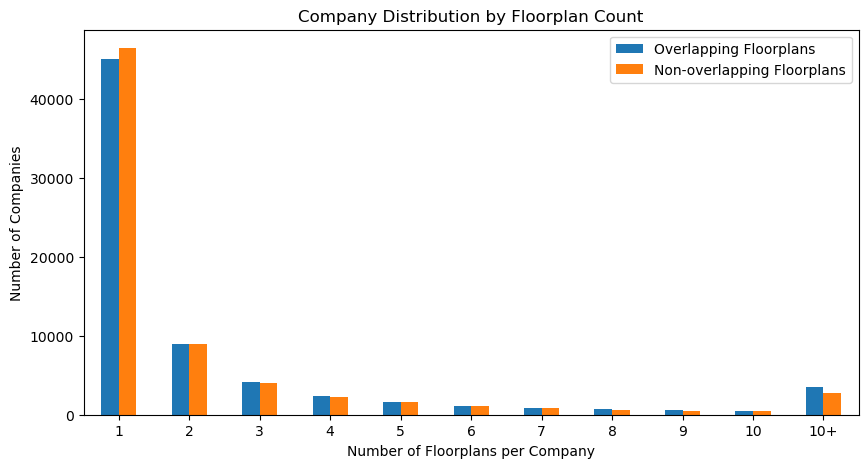

In [92]:
# plot company count by floorplan count
def floorplan_id_count_by_company_plot():
    # combine both overlapping and non-overlapping floorplans
    df = floorplan_id_count_by_company()
    df2 = floorplan_id_count_by_company_no_overlapping()
    df = df.merge(df2, how='outer', on='floorplan_count_per_company')
    df = df.fillna(0)
    # convert values larger than 10 to "10+"
    df.loc[df['floorplan_count_per_company'] > 10, 'floorplan_count_per_company'] = '10+'
    # convert to category
    df['floorplan_count_per_company'] = df['floorplan_count_per_company'].astype('category')
    # group by floorplan_count_per_company
    df = df.groupby('floorplan_count_per_company').sum()
    # plot side by side bars
    ax = df.plot.bar(rot=0, figsize=(10,5))
    ax.set_xlabel('Number of Floorplans per Company')
    ax.set_ylabel('Number of Companies')
    ax.set_title('Company Distribution by Floorplan Count')
    ax.legend(['Overlapping Floorplans', 'Non-overlapping Floorplans'])

floorplan_id_count_by_company_plot()

### flooplan and company data wrangling

In [346]:
# the following string joins floorplan data with users' status data
fp_sql = '''
    -- construct table data that includes floorplan, company_user_id, and paying status
    -- then create table all to count total fp counts regardless of paying status
    -- then create table paying to count fp counts for paying companies
    -- then create table not_paying to count fp counts for not-paying companies
    -- then union all, paying, and not_paying to get final table
    with comp as (
        SELECT * 
        -- number of start_dt for each company_user_id
        , COUNT(start_dt) OVER (PARTITION BY company_user_id) AS num_policies_started
        , ROW_NUMBER() OVER (PARTITION BY company_user_id ORDER BY start_dt) AS policy_num
        
        -- first join and last active
        , MIN(date(start_dt)) OVER (PARTITION BY company_user_id) AS first_join_dt
        , MAX(date(end_dt)) OVER (PARTITION BY company_user_id) AS last_active_dt
        
        -- get first and last free_or_paying status
        , CASE WHEN FIRST_VALUE(free_or_paying) OVER (PARTITION BY company_user_id ORDER BY start_dt) = 'paying' THEN 'paying'
            ELSE 'not-paying' END AS first_status           
        , CASE WHEN FIRST_VALUE(free_or_paying) OVER (PARTITION BY company_user_id ORDER BY end_dt DESC) = 'paying' THEN 'paying'
            ELSE 'not-paying' END AS last_status           
        
        -- paying vs not-paying
        , CASE WHEN free_or_paying = 'paying' THEN 'paying' ELSE 'not-paying' END AS paying_status
        
        -- lagged status
        , LAG(free_or_paying) OVER (PARTITION BY company_user_id ORDER BY start_dt) previous_status
        
        -- next status
        , LEAD(free_or_paying) OVER (PARTITION BY company_user_id ORDER BY start_dt) next_status

  
        FROM hive.gaia.dim_company_user_sku_ranges
        )

    , floorplans as (
        SELECT  fp.floorplan_id, fp.company_user_id, fp.individual_user_id, fp.created_at -- ,project_id, is_demo_project
        -- identify overlapping floorplans
        , coalesce(date_diff('minute', lag(fp.created_at) over(partition by fp.company_user_id order by fp.created_at), fp.created_at), 2) as minutes_since_prev
        
        -- create dynamic status column
        , CONCAT(FIRST_VALUE(comp.paying_status) OVER (PARTITION BY comp.company_user_id ORDER BY comp.start_dt), ' first ', 
                FIRST_VALUE(comp.paying_status) OVER (PARTITION BY comp.company_user_id ORDER BY comp.end_dt DESC), ' later') AS dynamic_status  

        ------ join witt company data -------        
        , comp.sku, comp.start_dt, comp.end_dt, comp.is_still_live, comp.free_or_paying, comp.paying_status
        , comp.num_policies_started, comp.policy_num, comp.first_status, comp.last_status, comp.previous_status
        , comp.first_join_dt first_fp_dt
        , comp.last_active_dt last_end_dt

        -- adjust created date so that it lies between first and last active date
        , CASE WHEN date(fp.created_at) < first_join_dt THEN first_join_dt 
                ELSE CASE WHEN date(fp.created_at) > last_active_dt THEN last_active_dt 
                    ELSE date(fp.created_at) END 
                    END  AS created_dt
        -- flag to count number of created date adjustments
        , CASE WHEN date(fp.created_at) < first_join_dt THEN -1 
                ELSE CASE WHEN date(fp.created_at) > last_active_dt THEN 1 
                    ELSE 0 END 
                    END  AS created_dt_adjustment_flag
            
        -- engineer cohort = quarter of first created dt for each company_user_id
        , date_trunc('quarter', first_join_dt) AS cohort

        -- first date of paying status as min of (if paying status = 'paying' then start_dt else 3000-01-01)
        , MIN(CASE WHEN paying_status = 'paying' THEN start_dt ELSE NULL END) OVER (PARTITION BY comp.company_user_id) AS first_paying_dt

        -- last date alive: if still alive then null else max end_dt per company_user_id
        , MAX(CASE WHEN is_still_live = 1 THEN NULL ELSE end_dt END) OVER (PARTITION BY comp.company_user_id) AS last_live_dt


        
        -- compny row number to create company level data later
        , ROW_NUMBER() OVER (PARTITION BY fp.company_user_id ORDER BY created_at DESC) AS company_row_num

        -- to match start and end dates with floorplans, first left outer join then keep only rows where created_dt is between start_dt and end_dt    
        FROM hive.gaia.dim_floorplans fp LEFT OUTER JOIN comp ON fp.company_user_id = comp.company_user_id
        WHERE CASE WHEN date(fp.created_at) < first_join_dt THEN first_join_dt 
                ELSE CASE WHEN date(fp.created_at) > last_active_dt THEN last_active_dt 
                    ELSE date(fp.created_at) END 
                    END 
            >= date(comp.start_dt) 
        AND CASE WHEN date(fp.created_at) < first_join_dt THEN first_join_dt 
                ELSE CASE WHEN date(fp.created_at) > last_active_dt THEN last_active_dt 
                    ELSE date(fp.created_at) END 
                    END 
            <= date(comp.end_dt)
        )
    , filtered as (
        SELECT * 
        -- recent floorplans:
        , CASE WHEN created_dt >= date_add('day', -7, current_date) THEN 1 ELSE 0 END AS recent_7_days
        , CASE WHEN created_dt >= date_add('day', -30, current_date) THEN 1 ELSE 0 END AS recent_30_days
        , CASE WHEN created_dt >= date_add('day', -90, current_date) THEN 1 ELSE 0 END AS recent_90_days
        , CASE WHEN created_dt >= date_add('day', -180, current_date) THEN 1 ELSE 0 END AS recent_180_days
        , CASE WHEN created_dt >= date_add('day', -365, current_date) THEN 1 ELSE 0 END AS recent_365_days
        FROM floorplans
        WHERE minutes_since_prev > 1 -- filter out overlapping floorplans
        )


    '''

    # sample 10 rows from fp_sql:
# pd.read_sql(fp_sql + 'SELECT * FROM filtered ORDER BY company_user_id, created_at LIMIT 50', conn)


### create a table for company-level features

In [347]:
# condense filtered into a table of company-level features
company_sql = fp_sql + '''
    SELECT
            company_user_id, first_fp_dt, last_end_dt, num_policies_started, is_still_live, last_live_dt
            , first_status, last_status 
            , cohort, dynamic_status, first_paying_dt

            -- tenure in months
            , date_diff('month', first_fp_dt, last_end_dt) AS tenure_months

            -- count of floorplans created per company_user_id
            , COUNT(floorplan_id) OVER (PARTITION BY company_user_id) AS num_floorplans_created 
            -- count of floorplans created per company_user_id over the last 7 days: sum (if created_dt >= 7 days ago then 1 else ) over company user id
            , SUM(recent_7_days) OVER (PARTITION BY company_user_id) AS num_floorplans_last_7d
            -- count of floorplans created per company_user_id over the last 30 days: 
            , SUM(recent_30_days) OVER (PARTITION BY company_user_id) AS num_floorplans_last_30d
            -- count of floorplans created per company_user_id over the last 90 days:
            , SUM(recent_90_days ) OVER (PARTITION BY company_user_id) AS num_floorplans_last_90d
            -- count of floorplans created per company_user_id over the last 180 days:
            , SUM(recent_180_days) OVER (PARTITION BY company_user_id) AS num_floorplans_last_180d
            -- count of floorplans created per company_user_id over the last 365 days:
            , SUM(recent_365_days) OVER (PARTITION BY company_user_id) AS num_floorplans_last_365d

    
        FROM filtered
        WHERE company_row_num = 1 -- keep only first row per company_user_id
        '''

# sample 10 rows from company_sql:
pd.read_sql(company_sql + 'LIMIT 10', conn)


,company_user_id,first_fp_dt,last_end_dt,num_policies_started,is_still_live,last_live_dt,first_status,last_status,cohort,dynamic_status,first_paying_dt,tenure_months,num_floorplans_created,num_floorplans_last_7d,num_floorplans_last_30d,num_floorplans_last_90d,num_floorplans_last_180d,num_floorplans_last_365d
0,115647,2020-01-01,2022-10-10,3,1,2021-10-29,paying,paying,2020-01-01,paying first paying later,2020-01-01,33,1,0,0,0,0,1
1,123450,2021-08-26,2022-10-10,1,0,2022-10-10,not-paying,not-paying,2021-07-01,not-paying first not-paying later,None,13,1,0,0,1,1,1
2,642843,2021-02-13,2022-10-10,3,0,2022-04-15,not-paying,not-paying,2021-01-01,not-paying first paying later,2021-03-15,19,1,0,0,0,0,1
3,644580,2021-02-24,2022-10-10,3,1,2022-02-23,paying,paying,2021-01-01,paying first paying later,2021-02-24,19,1,0,0,1,1,1
4,644693,2021-08-26,2022-10-10,2,0,2022-10-10,not-paying,not-paying,2021-07-01,not-paying first not-paying later,None,13,1,0,0,0,0,0
5,1254218,2020-01-01,2022-10-10,1,1,None,paying,paying,2020-01-01,paying first paying later,2020-01-01,33,1,0,0,0,0,0
6,1274700,2020-01-08,2022-10-10,1,1,None,paying,paying,2020-01-01,paying first paying later,2020-01-08,33,1,0,0,1,1,1
7,1425384,2021-02-19,2022-10-10,2,0,2021-03-09,not-paying,not-paying,2021-01-01,not-paying first not-paying later,None,19,1,0,0,0,0,0
8,1719256,2020-01-01,2022-10-10,2,0,2022-09-14,paying,not-paying,2020-01-01,paying first paying later,2020-01-01,33,1,0,0,0,0,0
9,2046937,2020-01-01,2022-10-10,1,1,None,paying,paying,2020-01-01,paying first paying later,2020-01-01,33,1,0,0,0,0,0


In [189]:
# track number of floorplan creators over time
def floorplan_creators_by_paying_over_time(period = 'quarter'):
    floorplan_sql = fp_sql + '''
    -- get total, paying, and not-paying company counts per quarter using union
    SELECT 'total' as paying_status
        , date_trunc('{0}', created_dt) AS {0}
        , COUNT(DISTINCT company_user_id) AS company_count  
    FROM filtered
    GROUP BY date_trunc('{0}', created_dt)  
    UNION ALL
    SELECT 'paying' as paying_status
        , date_trunc('{0}', created_dt) AS {0}
        , COUNT(DISTINCT company_user_id) AS company_count
    FROM filtered
    WHERE paying_status = 'paying'
    GROUP BY date_trunc('{0}', created_dt) 
    UNION ALL
    SELECT 'not-paying' as paying_status
        , date_trunc('{0}', created_dt) AS {0}
        , COUNT(DISTINCT company_user_id) AS company_count
    FROM filtered
    WHERE paying_status = 'not-paying'
    GROUP BY date_trunc('{0}', created_dt) 
    ORDER BY 1, 2
     
    '''.format(period)
    
    return pd.read_sql(floorplan_sql, conn)

floorplan_creators_by_paying_over_time(period = 'month')

,paying_status,month,company_count
0,not-paying,2020-08-01,49
1,not-paying,2020-09-01,92
2,not-paying,2020-10-01,169
3,not-paying,2020-11-01,225
4,not-paying,2020-12-01,226
...,...,...,...
90,total,2022-06-01,4972
91,total,2022-07-01,5055
92,total,2022-08-01,5581
93,total,2022-09-01,5568


### visual exploration

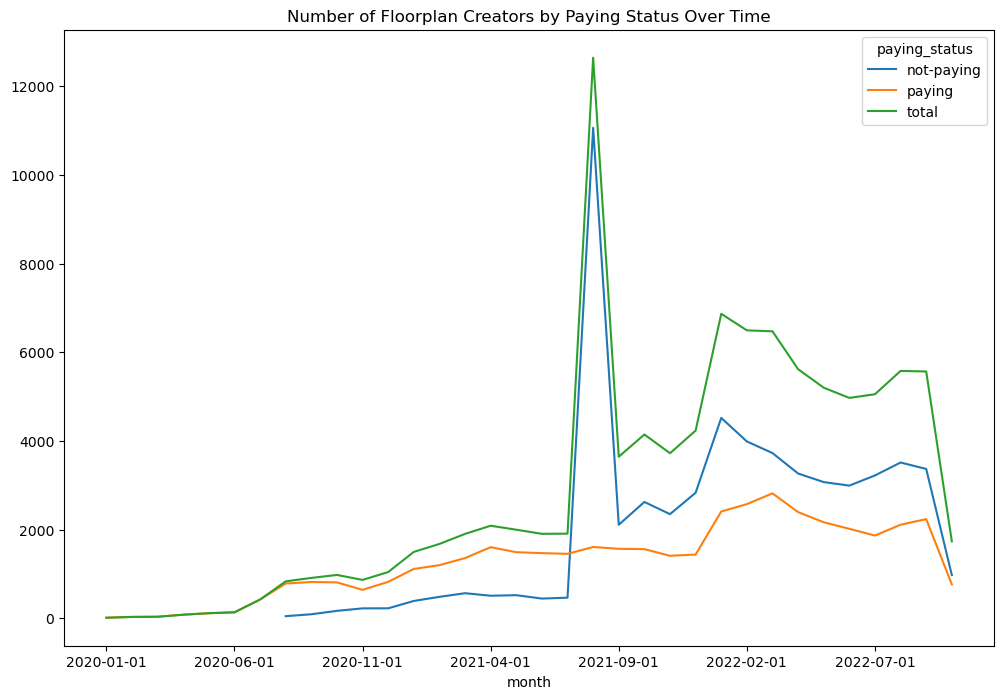

In [192]:
# plot number of floorplan creators over time
def floorplan_creators_by_paying_over_time_plot(period = 'quarter'):
    df = floorplan_creators_by_paying_over_time(period = period)
    df = df.pivot(index = period, columns = 'paying_status', values = 'company_count')
    df.plot(figsize = (12, 8), title = 'Number of Floorplan Creators by Paying Status Over Time')


floorplan_creators_by_paying_over_time_plot(period = 'month')

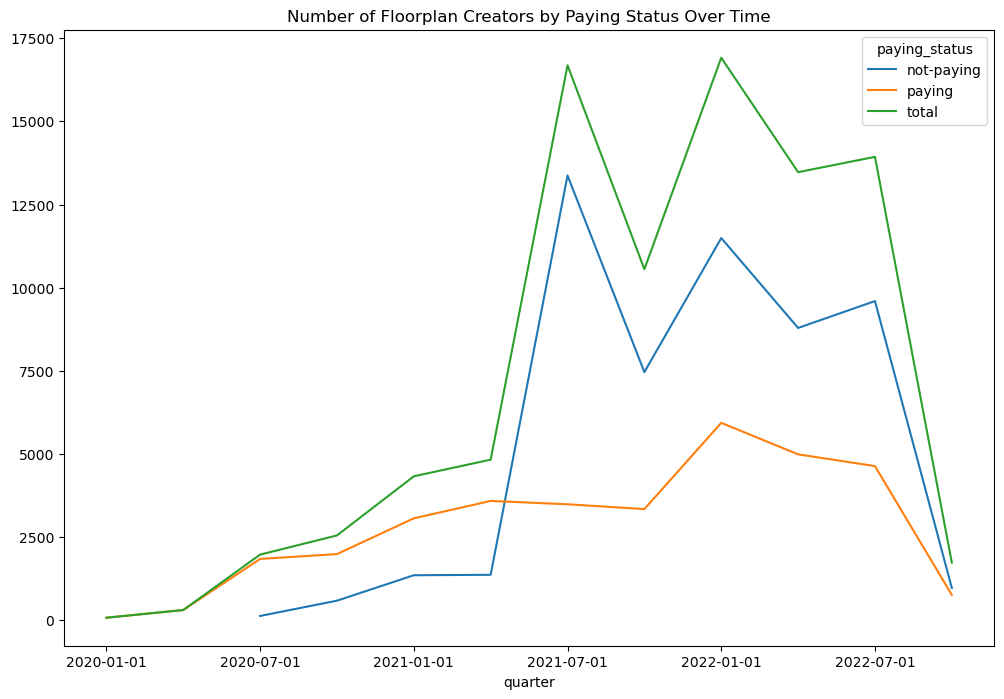

In [193]:
floorplan_creators_by_paying_over_time_plot(period = 'quarter')

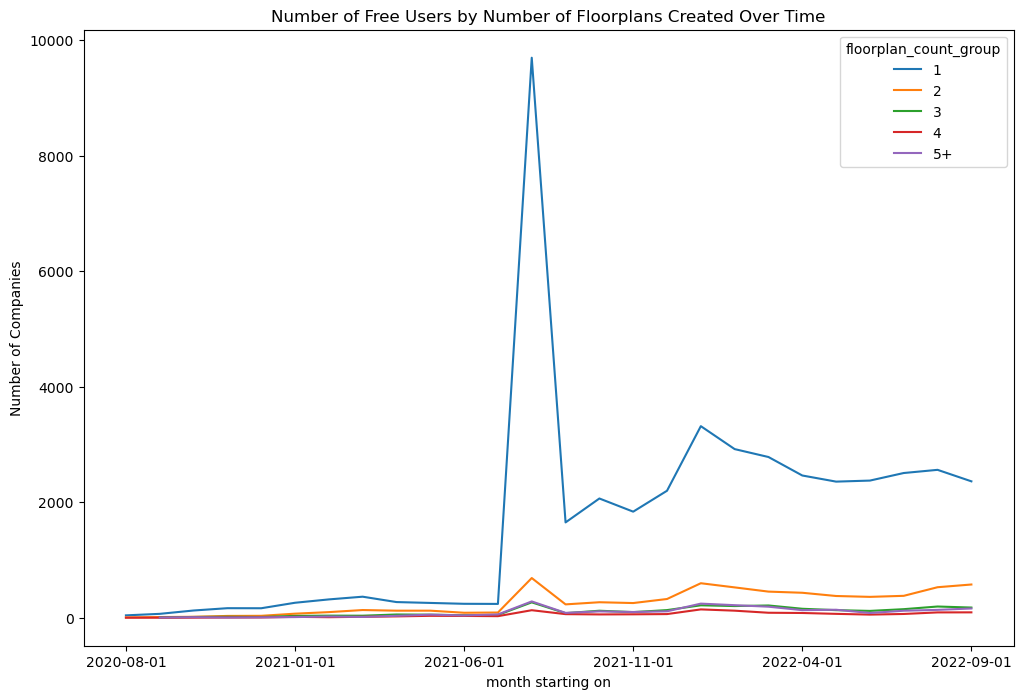

In [219]:
# plot number of free users by number of floorplans created over time
def free_users_by_floorplans_over_time(period = 'quarter'):
    free_sql = fp_sql + '''
    -- group data by firms who are in not-paying status
    , com as (
        SELECT date_trunc('{0}', created_dt) AS {0}
            , company_user_id
            , COUNT(DISTINCT floorplan_id) AS floorplan_count

        FROM filtered
        WHERE paying_status = 'not-paying'
        GROUP BY date_trunc('{0}', created_dt), company_user_id
        )
    -- cap floorplan counts at 5
    , capped as (
        SELECT {0}, company_user_id
            , CASE WHEN floorplan_count >=5 THEN '5+' ELSE CAST(floorplan_count AS VARCHAR) END AS floorplan_count_group
        FROM com
        )
    SELECT {0}, floorplan_count_group, COUNT(DISTINCT company_user_id) AS company_count
    FROM capped
    GROUP BY {0}, floorplan_count_group
    ORDER BY 1, 2

     
    '''.format(period)
    
    df = pd.read_sql(free_sql, conn)
    # include only up to third quarter 2022
    df = df[df[period] <= '2022-09-01']
    # make lines chart; each line for a different floorplan count group
    df = df.pivot(index = period, columns = 'floorplan_count_group', values = 'company_count')
    ax = df.plot(figsize = (12, 8), title = 'Number of Free Users by Number of Floorplans Created Over Time')
    ax.set_ylabel('Number of Companies')
    ax.set_xlabel(period + ' starting on')

    # make the same chart for users of 2 or more floorplans
    # df = df[['2', '3', '4', '5+']]
    # df.plot(figsize = (12, 8), title = 'Number of Free Users by Number of Floorplans Created Over Time (2+ Floorplans)')
    
    
    

free_users_by_floorplans_over_time(period = 'month')

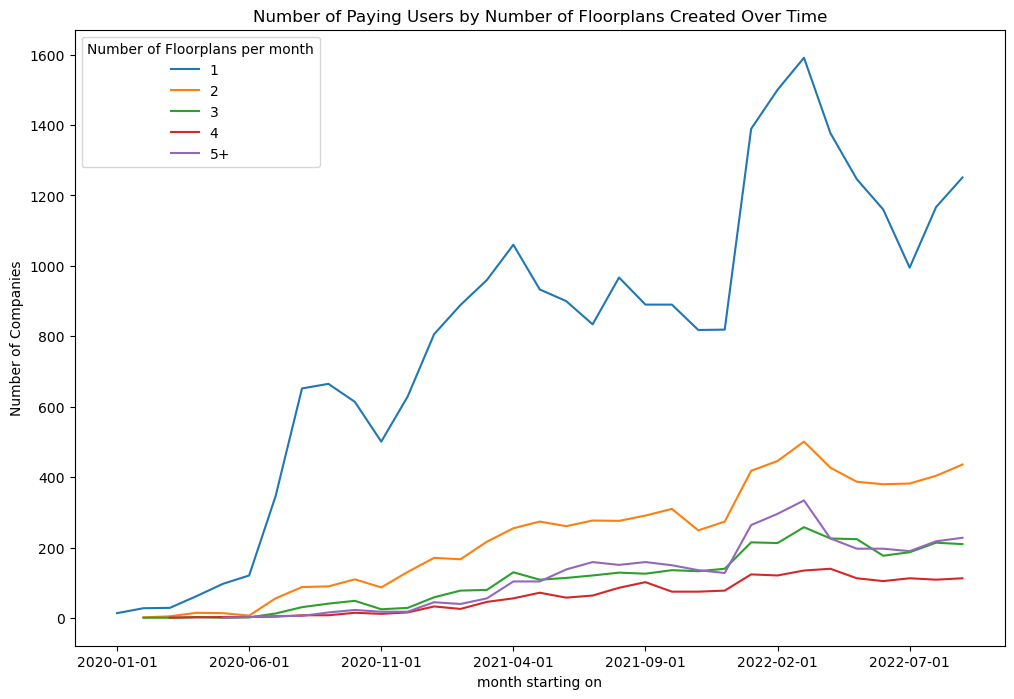

In [230]:
# plot number of paying users by number of floorplans created over time
def paying_users_by_floorplans_over_time(period = 'quarter'):
    paying_sql = fp_sql + '''
    -- group data by firms who are in paying status
    , com as (
        SELECT date_trunc('{0}', created_dt) AS {0}
            , company_user_id
            , COUNT(DISTINCT floorplan_id) AS floorplan_count

        FROM filtered
        WHERE paying_status = 'paying'
        GROUP BY date_trunc('{0}', created_dt), company_user_id
        )
    -- cap floorplan counts at 5
    , capped as (
        SELECT {0}, company_user_id
            , CASE WHEN floorplan_count >=5 THEN '5+' ELSE CAST(floorplan_count AS VARCHAR) END AS floorplan_count_group
        FROM com
        )
    SELECT {0}, floorplan_count_group, COUNT(DISTINCT company_user_id) AS company_count
    FROM capped
    GROUP BY {0}, floorplan_count_group
    ORDER BY 1, 2

     
    '''.format(period)
    
    df = pd.read_sql(paying_sql, conn)
    # include only up to third quarter 2022
    df = df[df[period] <= '2022-09-30']
    # make lines chart; each line for a different floorplan count group
    df = df.pivot(index = period, columns = 'floorplan_count_group', values = 'company_count')
    ax = df.plot(figsize = (12, 8), title = 'Number of Paying Users by Number of Floorplans Created Over Time')
    ax.set_ylabel('Number of Companies')
    ax.set_xlabel(period + ' starting on')
    # set legend title
    ax.legend(title = 'Number of floorplans per {0}'.format(period))

    # make the same chart for users of 2 or more floorplans
    # df = df[['2', '3', '4', '5+']]
    # df.plot(figsize = (12, 8), title = 'Number of Paying Users by Number of Floorplans Created Over Time (2+ Floorplans)')

paying_users_by_floorplans_over_time(period = 'month')

In [228]:
# construct table of this schema:
    # paying status: paying, not-paying, total
    # floorplan counts
    # company counts for each floorplan count

def floorplan_count_by_company_paying():
    floorplan_sql = fp_sql + '''

    , all as (
        SELECT company_user_id, count(distinct floorplan_id) as floorplan_count
        FROM filtered
        GROUP BY 1
        )
    ,paying as (
        SELECT company_user_id, count(distinct floorplan_id) as floorplan_count
        FROM filtered
        WHERE free_or_paying = 'paying'
        GROUP BY 1
        )
    ,not_paying as (
        SELECT company_user_id, count(distinct floorplan_id) as floorplan_count
        FROM filtered
        WHERE free_or_paying <> 'paying'
        GROUP BY 1
        )
    ,not_paying_then_paying as (
        SELECT company_user_id, count(distinct floorplan_id) as floorplan_count
        FROM filtered
        WHERE dynamic_status = 'not-paying first paying later' AND is_still_live = 1
        GROUP BY 1
        )
    ,paying_then_not_paying as (
        SELECT company_user_id, count(distinct floorplan_id) as floorplan_count
        FROM filtered   
        WHERE dynamic_status = 'paying first not-paying later' OR (dynamic_status = 'paying first paying later' AND is_still_live = 0)
        GROUP BY 1
        )
    ,paying_first_and_later as (
        SELECT company_user_id, count(distinct floorplan_id) as floorplan_count
        FROM filtered
        WHERE dynamic_status = 'paying first paying later' AND is_still_live = 1
        GROUP BY 1
        )
    ,not_paying_first_and_later as (
        SELECT company_user_id, count(distinct floorplan_id) as floorplan_count
        FROM filtered
        WHERE dynamic_status = 'not-paying first not-paying later' OR (dynamic_status = 'not-paying first paying later' AND is_still_live = 0)
        GROUP BY 1
        )


    SELECT 'all' as paying_status, floorplan_count, count(distinct company_user_id) as company_count
    FROM all
    GROUP BY 1,2
    UNION ALL
    SELECT 'paying' as paying_status, floorplan_count, count(distinct company_user_id) as company_count
    FROM paying
    GROUP BY 1,2
    UNION ALL
    SELECT 'not_paying' as paying_status, floorplan_count, count(distinct company_user_id) as company_count
    FROM not_paying
    GROUP BY 1,2
    UNION ALL
    SELECT '4: free to paying' as paying_status, floorplan_count, count(distinct company_user_id) as company_count
    FROM not_paying_then_paying
    GROUP BY 1,2
    UNION ALL
    SELECT '2: paying to free/ended' as paying_status, floorplan_count, count(distinct company_user_id) as company_count
    FROM paying_then_not_paying
    GROUP BY 1,2
    UNION ALL
    SELECT '3: paying throughout' as paying_status, floorplan_count, count(distinct company_user_id) as company_count
    FROM paying_first_and_later
    GROUP BY 1,2
    UNION ALL
    SELECT '1: free throughout' as paying_status, floorplan_count, count(distinct company_user_id) as company_count
    FROM not_paying_first_and_later
    GROUP BY 1,2
    ORDER BY 1,2
    '''
    
    return pd.read_sql(floorplan_sql, conn)



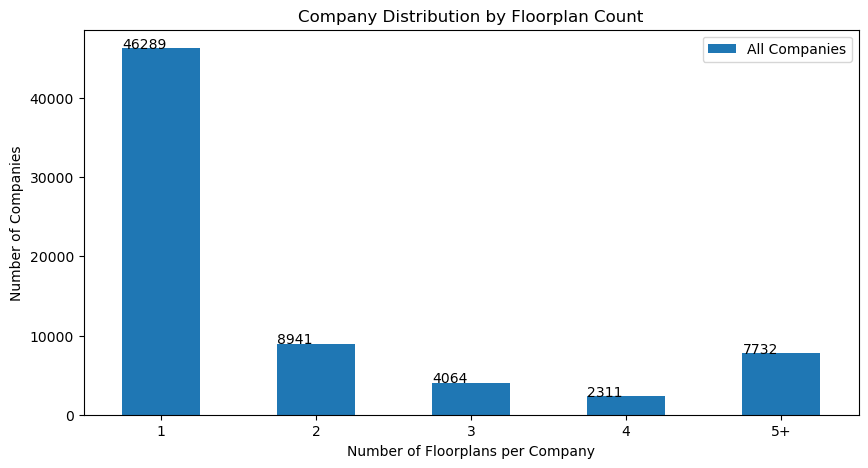

In [172]:
# plot total counts of company by floorplan count regardless of paying status
def floorplan_count_by_companyplot():
    df = floorplan_count_by_company_paying()
    # keep only total counts ('all')
    df = df[df['paying_status'] == 'all']
    # convert 12 or higher to 12+
    df.loc[df['floorplan_count'] >= 5, 'floorplan_count'] = '5+'
    # group by floorplan_count_per_company
    df = df.groupby('floorplan_count').sum()
    # plot side by side bars
    ax = df.plot.bar(rot=0, figsize=(10,5))
    # add total counts on top of bars
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() , p.get_height() +5))
    ax.set_xlabel('Number of Floorplans per Company')
    ax.set_ylabel('Number of Companies')
    ax.set_title('Company Distribution by Floorplan Count')
    ax.legend(['All Companies', 'Paying Companies', 'Not-paying Companies'])

floorplan_count_by_companyplot()

In [348]:
# plot distribution of compnaies by floorplan created last month, last quarter, last year
# first convert 10 or more to 10+

def plot_company_distribution_by_floorplan_created_recent(num_days = 30):
    # get company-level data
    df = pd.read_sql(company_sql, conn)
    # cap monthly floorplan counts at 10
    df.loc[df['num_floorplans_last_{0}d'.format(num_days)] >= 10, 'num_floorplans_last_{0}d'.format(num_days)] = '10+'
    # group by floorplan count
    df = df.groupby('num_floorplans_last_{0}_days'.format(num_days)).count()['company_user_id']
    # plot side by side bars
    ax = df.plot.bar(rot=0, figsize=(10,5))
    # add total counts on top of bars
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() , p.get_height() +5))
    ax.set_xlabel('Number of Floorplans Created in Last {0} Days'.format(num_days))
    ax.set_ylabel('Number of Companies')
    ax.set_title('Company Distribution by Floorplan Created in Last {0} Days'.format(num_days))

    return df.head(10)    

plot_company_distribution_by_floorplan_created_recent(num_days = 180)

KeyError: 'num_floorplans_last_180_days'

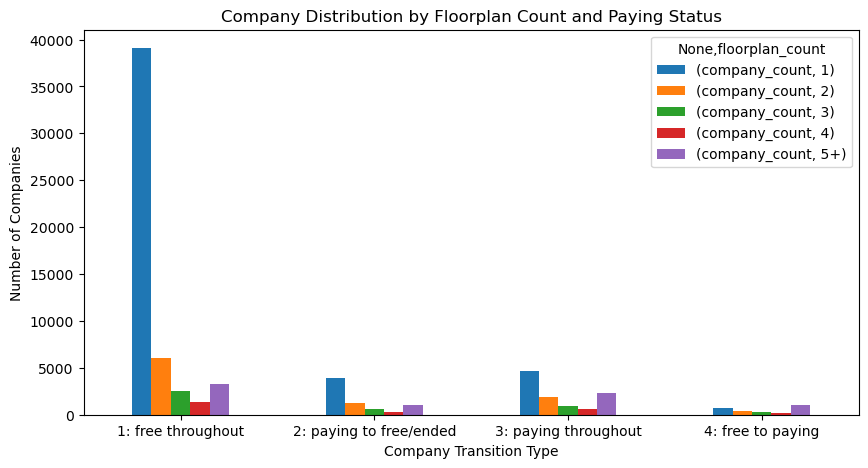

In [229]:
# from the above table, plot a stacked bar chart of company counts by floorplan count and paying status
# challenge: this graph double counts companies that changed status over time

def floorplan_count_by_company_paying_plot():
    # first get data
    df = floorplan_count_by_company_paying()
    # filter out total
    df = df[~df['paying_status'].isin(['all', 'paying', 'not_paying'])]
    # if floorplan_count is larger than 12, convert to '12+'
    df.loc[df['floorplan_count'] >= 5, 'floorplan_count'] = '5+'
    # convert floorplan_count to string
    # df['floorplan_count'] = df['floorplan_count'].astype(str)
    # use group by to pool all 12+ into one category
    df = df.groupby(['paying_status', 'floorplan_count']).sum().reset_index()
    # set index
    df = df.set_index(['paying_status', 'floorplan_count'])
    # unstack
    df = df.unstack(level=1)
    # plot
    ax = df.plot.bar(rot=0, figsize=(10,5))
    ax.set_xlabel('Company Transition Type')
    ax.set_ylabel('Number of Companies')
    ax.set_title('Company Distribution by Floorplan Count and Paying Status')
    # ax.legend(['Not Paying', 'Paying'])

floorplan_count_by_company_paying_plot()



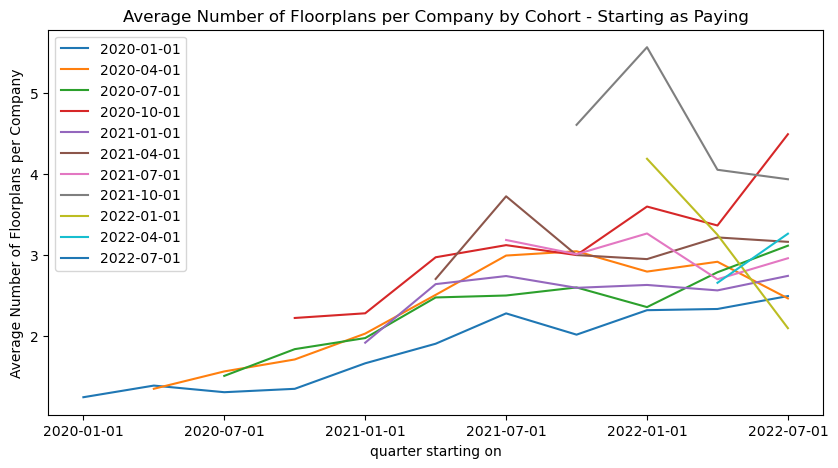

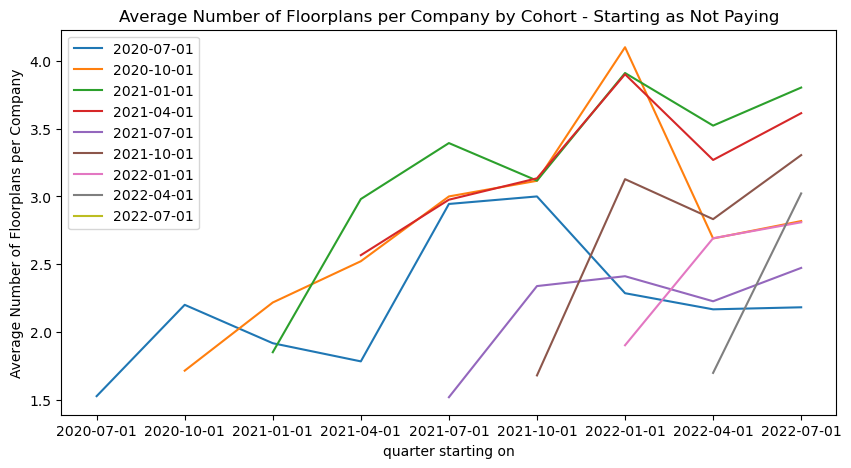

In [271]:
# for each quarterly cohort, how do groups by first paying status change in number floorplans over time? plot time chart

def plot_floorplan_number_average_per_company_by_transition_type_by_time(period='quarter'):
    # data requires first status, cohort, period, floorplan count, transition type
    floorplan_sql = fp_sql + '''

    -- total floorplans per company per period
    , company_floorplan_count_per_period as (
        SELECT company_user_id, date_trunc('{0}', created_dt) AS {0}
        , min(first_status) first_paying_status, min(cohort) cohort
        , count(distinct floorplan_id) as floorplan_count
        FROM filtered
        GROUP BY company_user_id, date_trunc('{0}', created_dt)
        )
    -- average number of floorplans per company by first paying status and cohort and time period
    
        SELECT cohort, first_paying_status, {0}, avg(floorplan_count) as floorplan_count
        FROM company_floorplan_count_per_period
        GROUP BY cohort, first_paying_status, {0}
        ORDER BY cohort, first_paying_status, {0}


    '''.format(period) 

    df = pd.read_sql(floorplan_sql, conn)
    # keep only period prior to 2022-10-01
    df = df[df[period] < '2022-10-01']
    # plot time chart for cohorts whose first paying status = 'paying'
    df = df[df['first_paying_status'] == 'paying']
    # set cohort labels
    cohort_labels = sorted(df['cohort'].unique())
    # set index
    df = df.set_index(['cohort', period])
    # unstack
    df = df.unstack(level=0)
    # plot
    ax = df.plot(figsize=(10,5))
    ax.set_xlabel('{0} starting on'.format(period))
    ax.set_ylabel('Average Number of Floorplans per Company')
    ax.set_title('Average Number of Floorplans per Company by Cohort - Starting as Paying')
    ax.legend(cohort_labels)

    # make same plot for cohorts whose first paying status = 'not_paying'
    df = pd.read_sql(floorplan_sql, conn)
    # keep only period prior to 2022-10-01
    df = df[df[period] < '2022-10-01']
    # plot time chart for cohorts whose first paying status = 'paying'
    df = df[df['first_paying_status'] != 'paying']
    # set cohort labels
    cohort_labels = sorted(df['cohort'].unique())
    # set index
    df = df.set_index(['cohort', period])
    # unstack
    df = df.unstack(level=0)
    # plot
    ax = df.plot(figsize=(10,5))
    ax.set_xlabel('{0} starting on'.format(period))
    ax.set_ylabel('Average Number of Floorplans per Company')
    ax.set_title('Average Number of Floorplans per Company by Cohort - Starting as Not Paying')   
    ax.legend(cohort_labels)


plot_floorplan_number_average_per_company_by_transition_type_by_time('quarter')
    


### other ideas:

- how many days between the first (group of) floorplan and the next one?

- one or 2 per months seem to be growing consistently; what/how can i learn more about them?

- identify the first date of payment; anything happens between the first floorplan and the first date of paying subscription?

## explore floorplan elements

In [279]:
# get a sample from floorplan element table

# types of floorplan
# datetime for modifying of floorplan

def get_floorplan_element_sample():
    sql = '''
    SELECT *
    FROM hive.gaia.dim_floorplan_elements
    ORDER BY 3, 5
    LIMIT 10
    '''
    df = pd.read_sql(sql, conn)
    return df

get_floorplan_element_sample()

,floorplan_element_id,floorplan_id,company_user_id,individual_user_id,created_at,created_dt,modified_at,modified_dt,type,type_name
0,3152840,177545514,284,284,2021-10-05 15:56:54.000,2021-10-05,2021-10-05 15:56:54.000,2021-10-05,15,point
1,3152846,177545514,284,284,2021-10-05 15:56:54.000,2021-10-05,2021-10-05 15:56:54.000,2021-10-05,11,wall
2,3152847,177545514,284,284,2021-10-05 15:56:54.000,2021-10-05,2021-10-05 15:57:22.000,2021-10-05,11,wall
3,3152842,177545514,284,284,2021-10-05 15:56:54.000,2021-10-05,2021-10-05 15:56:54.000,2021-10-05,15,point
4,3152843,177545514,284,284,2021-10-05 15:56:54.000,2021-10-05,2021-10-05 15:57:22.000,2021-10-05,15,point
5,3152844,177545514,284,284,2021-10-05 15:56:54.000,2021-10-05,2021-10-05 15:56:54.000,2021-10-05,11,wall
6,3152845,177545514,284,284,2021-10-05 15:56:54.000,2021-10-05,2021-10-05 15:57:22.000,2021-10-05,11,wall
7,3152841,177545514,284,284,2021-10-05 15:56:54.000,2021-10-05,2021-10-05 15:56:54.000,2021-10-05,15,point
8,3152848,177545514,284,284,2021-10-05 15:56:54.000,2021-10-05,2021-10-05 15:57:22.000,2021-10-05,10,floor
9,14119523,187195106,378,378,2022-06-09 00:03:35.000,2022-06-08,2022-06-09 00:03:35.000,2022-06-08,11,wall


In [280]:
# types of floorplan and their distribution in id count

In [281]:
# summarize company_user_id by the type of floorplan they do?

In [ ]:
# duration of floorplan = between created_at and last modified_at for each floorplan id